In [1]:
import geopandas as gpd
import pandas as pd
#import plotly.express as px

# Exploring pesticide use

In [4]:
ag_chem_county = pd.read_parquet("ag_pesticides_modified.parquet", engine = "fastparquet", columns = ["county_name","pct_chem_used"])

In [19]:
ag_chem_county["county_name"]

0           Sonoma
1           Sonoma
2           Sonoma
3           Sonoma
4           Sonoma
            ...   
3731838    Alameda
3731839    Alameda
3731840    Alameda
3731841    Alameda
3731842    Alameda
Name: county_name, Length: 3731843, dtype: object

In [13]:
non_geo = ag_chem_county.groupby("county_name", as_index = False).mean()
county_geo = gpd.read_file("/srv/data/my_shared_data_folder/cpr/california_counties.gpkg", columns = ["NAMELSAD","geometry"])

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,SIERRA,Sierra County,06,H1,G4020,NaN,NaN,NaN,A,2468694587,23299110,+39.5769252,-120.5219926,"MULTIPOLYGON (((-13431319.751 4821511.426, -13..."
1,06,067,00277298,06067,SACRAMENTO,Sacramento County,06,H1,G4020,472,40900,NaN,A,2499183617,76073827,+38.4500114,-121.3404409,"MULTIPOLYGON (((-13490651.476 4680831.603, -13..."
2,06,083,00277306,06083,SANTA BARBARA,Santa Barbara County,06,H1,G4020,NaN,42200,NaN,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,CALAVERAS,Calaveras County,06,H1,G4020,NaN,NaN,NaN,A,2641820834,43806026,+38.1838996,-120.5614415,"MULTIPOLYGON (((-13428575.483 4627725.228, -13..."
4,06,111,00277320,06111,VENTURA,Ventura County,06,H1,G4020,348,37100,NaN,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."
5,06,037,00277283,06037,LOS ANGELES,Los Angeles County,06,H1,G4020,348,31080,31084,A,10510651024,1794730436,+34.1963983,-118.2618616,"MULTIPOLYGON (((-13210018.388 3958856.141, -13..."
6,06,097,01657246,06097,SONOMA,Sonoma County,06,H1,G4020,488,42220,NaN,A,4081437574,497508807,+38.5251824,-122.9261095,"MULTIPOLYGON (((-13685069.767 4623872.832, -13..."
7,06,031,00277280,06031,KINGS,Kings County,06,H1,G4020,546,25260,NaN,A,3598583450,5468555,+36.0724780,-119.8155301,"MULTIPOLYGON (((-13353767.857 4335831.239, -13..."
8,06,073,00277301,06073,SAN DIEGO,San Diego County,06,H1,G4020,NaN,41740,NaN,A,10895149811,826195031,+33.0236041,-116.7761174,"MULTIPOLYGON (((-13073075.796 3919158.524, -13..."
9,06,061,00277295,06061,PLACER,Placer County,06,H1,G4020,472,40900,NaN,A,3644333049,246486852,+39.0620323,-120.7227181,"MULTIPOLYGON (((-13476944.153 4722608.150, -13..."


In [9]:

fig = px.bar(ag_pesticides, x='county_name', y='pct_chem_used')
fig.show()

NameError: name 'px' is not defined

In [3]:
only_need = ag_pesticides[["county_name", "pct_chem_used", "geometry"]]

In [5]:
only_need = only_need[:400]

In [6]:
only_need["county_name"].nunique()

58

In [7]:
only_need["geometry"].nunique()

23409

In [5]:
by_plot = ag_pesticides[["county_name", "pct_chem_used", "geometry"]].groupby("geometry", as_index=False).agg({"pct_chem_used":"max"})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23409 entries, 0 to 23408
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       23409 non-null  geometry
 1   pct_chem_used  23409 non-null  float64 
dtypes: float64(1), geometry(1)
memory usage: 365.9 KB


In [6]:
by_plot.columns = ["pandas", "pct_chem_used"]
merged = pd.merge(ag_pesticides["geometry"], by_plot, how = "left", left_on = "geometry", right_on = "pandas")

In [8]:
merged = merged.drop_duplicates()
merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 23409 entries, 0 to 3730985
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   geometry       23409 non-null  geometry
 1   pandas         23409 non-null  geometry
 2   pct_chem_used  23409 non-null  float64 
dtypes: float64(1), geometry(2)
memory usage: 731.5 KB


<Axes: >

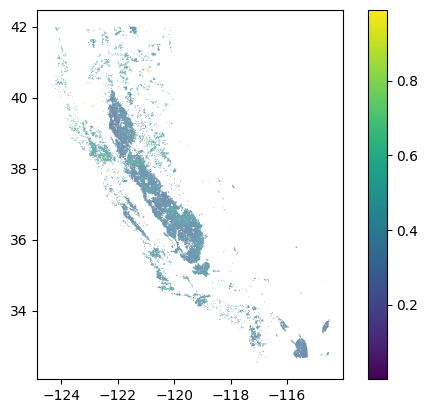

In [9]:
#https://geopandas.org/en/stable/docs/user_guide/mapping.html

merged.plot(column='pct_chem_used', legend=True)

In [ ]:
#https://plotly.com/python/mapbox-county-choropleth/